## Time Sereis 
Differences to a regular regression problems
1. Time dependent 
2. Time sereis hase seasonality trends

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt 
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [2]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

parse_dates: This specifies the column which contains the date-time information
index_col: tells pandas to use the ‘Month’ column as index.
date_parser: This specifies a function which converts an input string into datetime variable.

In [9]:
why 
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

## Check Stationary, is the variance remain constant over time?

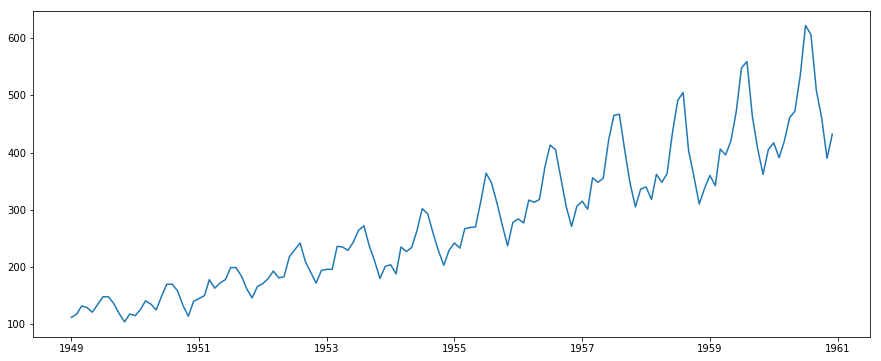

In [11]:
plt.plot(data)

1. Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
2. Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [12]:
from statsmodels.tsa.stattools import adfuller

In [59]:
def check_stationarity(timeseries):
   
    rollmean = timeseries.rolling(window=12,center=False).mean()
    rollstd= timeseries.rolling(window=12,center=False).std()
     
    origin = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rollmean, color='red',label='Rolling Mean')
    std = plt.plot(rollstd, color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #Dickey-Fuller test 
    print ('Dickey-Fuller test ')
    dftest = adfuller(timeseries.iloc[:,0],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print (dfoutput)

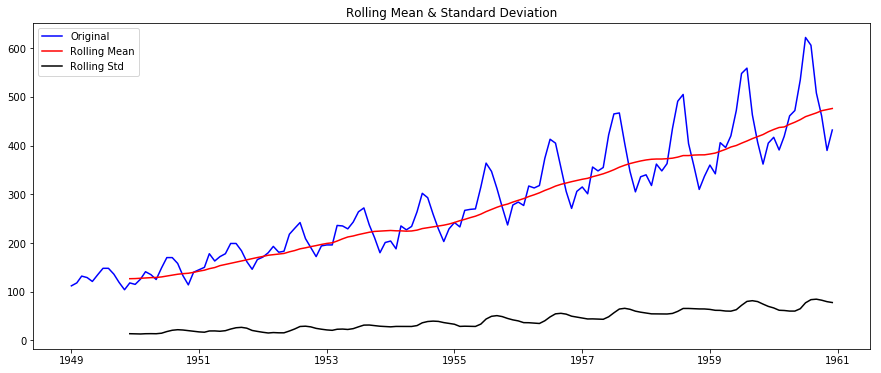

Dickey-Fuller test 
Test Statistic                   0.815369
p-value                          0.991880
#lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [60]:
check_stationarity(data)

Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series. 

## Make time series stationary
1. Trend: varying mean over time.
2. Seasonality: variations at specific time-frames.

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

### Moving Average

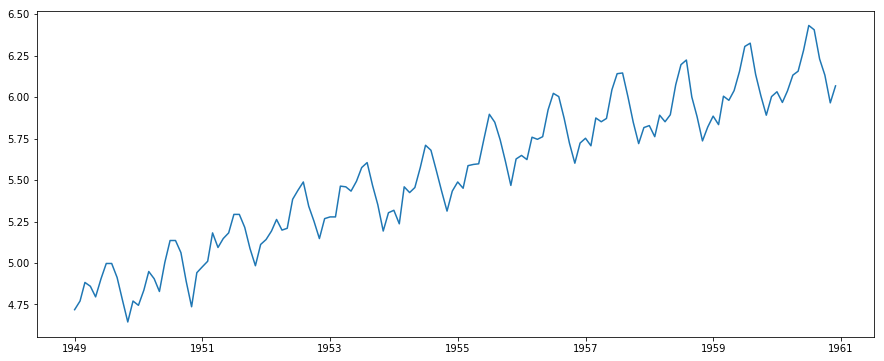

In [27]:
#taking log transformation, penalize higher values more than smaller values (log, square root, cube root )
data_log = np.log(data)
plt.plot(data_log)

1. Aggregation – taking average for a time period like monthly/weekly averages
2. Smoothing – taking rolling averages
3. Polynomial Fitting – fit a regression model

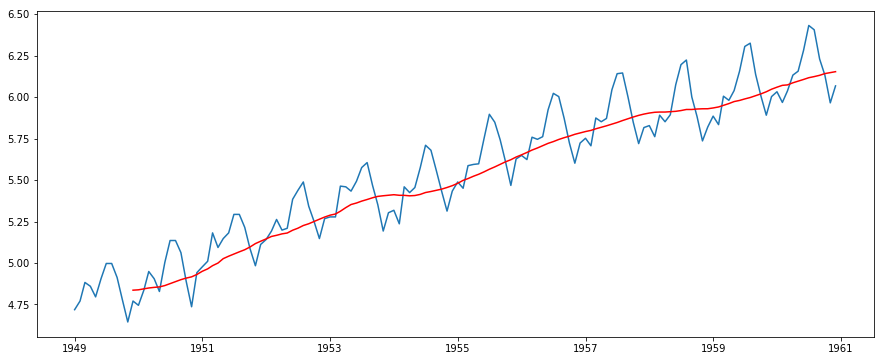

In [28]:
#take average over the past 1 year 
moving_avg = data_log.rolling(window=12,center=False).mean()
plt.plot(data_log)
plt.plot(moving_avg,color='red')

In [32]:
data_log_moving_avg_diff = data_log - moving_avg
data_log_moving_avg_diff.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


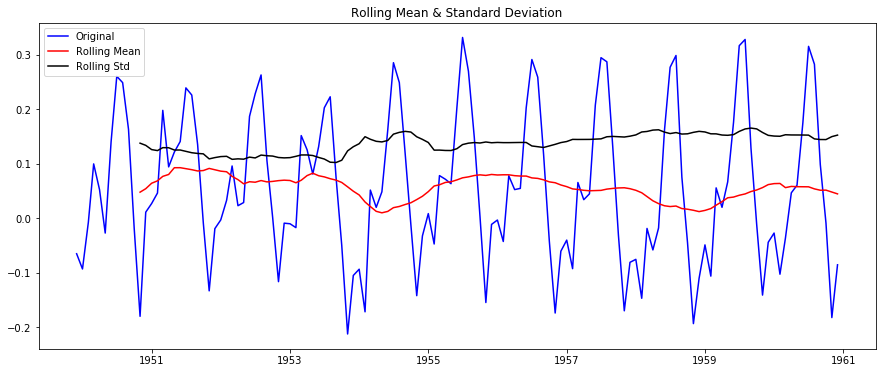

Dickey-Fuller test 
Test Statistic                  -3.162908
p-value                          0.022235
#lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [61]:
data_log_moving_avg_diff.dropna(inplace=True)
check_stationarity(data_log_moving_avg_diff)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app


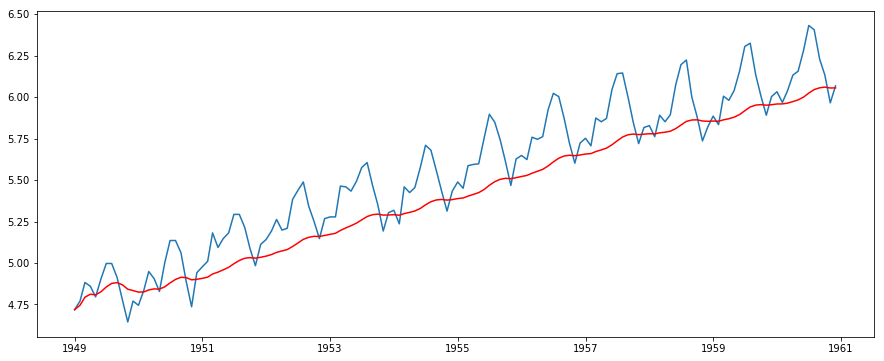

In [64]:
#use weighted moving average - exponentially weighted moving average
expwighted_avg = pd.ewma(data_log, halflife=12)
plt.plot(data_log)
plt.plot(expwighted_avg, color='red')

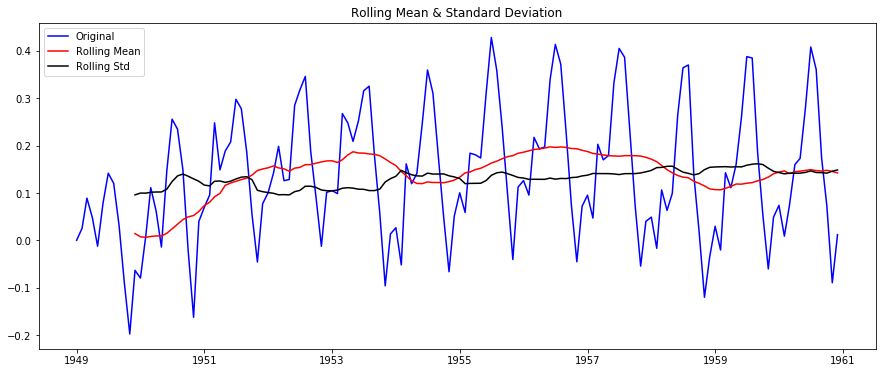

Dickey-Fuller test 
Test Statistic                  -3.601262
p-value                          0.005737
#lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [65]:
data_log_ewma_diff = data_log - expwighted_avg
check_stationarity(data_log_ewma_diff)

### Eliminating Trend and Seasonality 
1. Differencing – taking the differece with a particular time lag
2. Decomposition – modeling both trend and seasonality and removing them from the model.

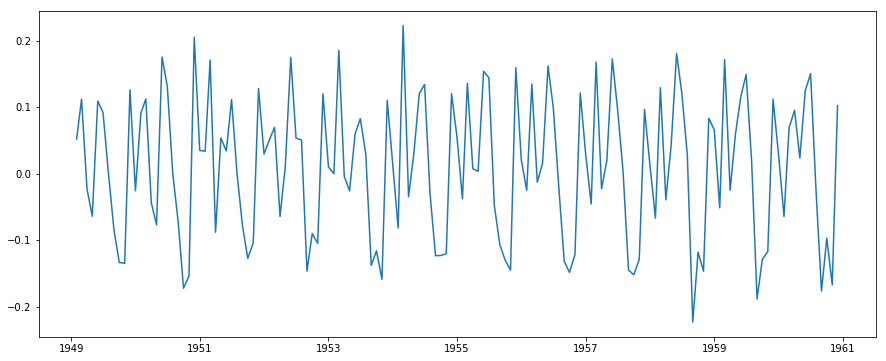

In [66]:
#take the difference of the observation at a particular instant with that at the previous instant. 
data_log_diff = data_log - data_log.shift()
plt.plot(data_log_diff)

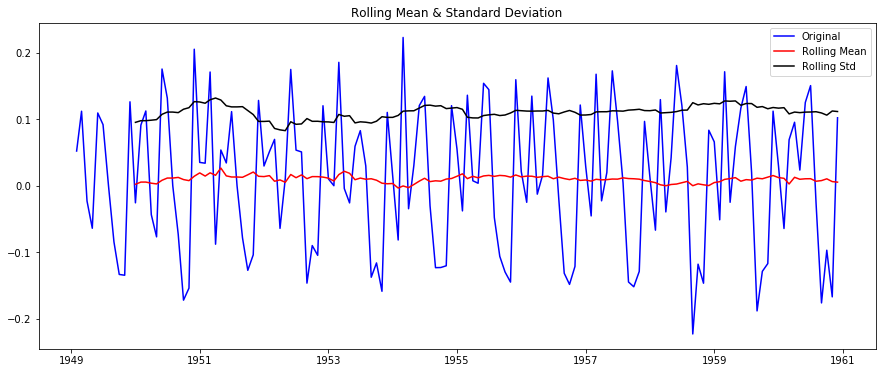

Dickey-Fuller test 
Test Statistic                  -2.717131
p-value                          0.071121
#lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [67]:
data_log_diff.dropna(inplace=True)
check_stationarity(data_log_diff)

The mean and std variations have small variations with time. Also, the Dickey-Fuller test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence. We can also take second or third order differences which might get even better results in certain applications.

In [73]:
#both trend and seasonality are modeled separately and the remaining part of the series is returned.
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout(ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose))

TypeError: 'numpy.float64' object cannot be interpreted as an integer

## Forecastign a Time Series 

1. A strictly stationary series with no dependence among the values. This is the easy case wherein we can model the residuals as white noise. But this is very rare.
2. A series with significant dependence among values. In this case we need to use some statistical models like ARIMA to forecast the data.

ARIMA, Auto-Regressive Integrated Moving Averages. a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

1. Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
2. Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
3. Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

How to determine the value of 'p' and 'q'

1. Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
2. Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

In [74]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data_log_diff, nlags=20)
lag_pacf = pacf(data_log_diff, nlags=20, method='ols')

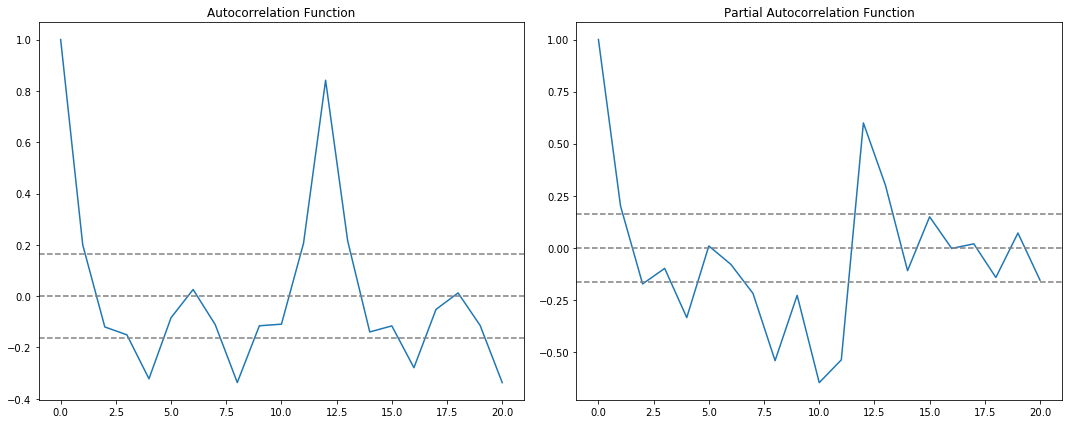

In [78]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

The two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:
1. p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
2. q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

## AR Model

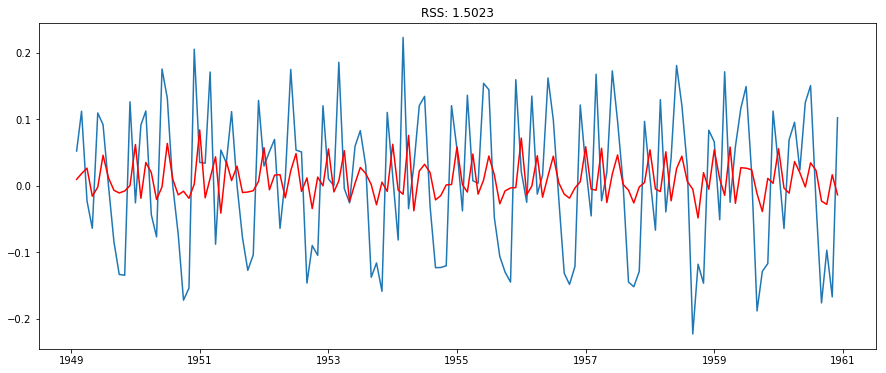

In [110]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(data_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data_log_diff.iloc[:,0])**2))

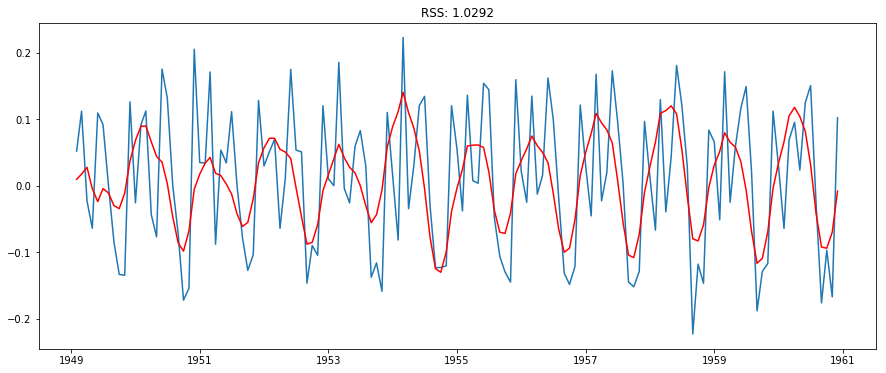

In [111]:
model = ARIMA(data_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(data_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-data_log_diff.iloc[:,0])**2))

In [107]:
type(results_AR.fittedvalues)

pandas.core.series.Series

## Back to original scale

In [113]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [115]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [142]:
predictions_ARIMA_log = pd.Series(data_log.ix[0], index=data_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01         NaN
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
dtype: float64

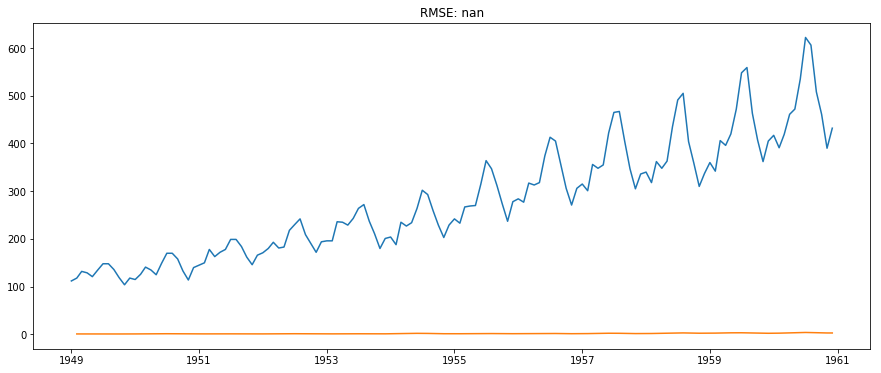

In [148]:
predictions_ARIMA.dropna(inplace=True)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data.iloc[:,0])**2)/len(data)))